In [16]:
# Install & import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load data
df = pd.read_csv("/content/12. Seaborn_Batsman (1).csv")

In [18]:
# View structure
print(" Dataset Shape:", df.shape)
print(" Columns:\n", df.columns)
print(" Data Types:\n", df.dtypes)
print("\n Sample Rows:\n", df.head())


 Dataset Shape: (208, 7)
 Columns:
 Index(['RunsScored', 'BallsFaced', 'BattingPosition', 'Dismissal', 'Inning',
       'Opposition', 'Year'],
      dtype='object')
 Data Types:
 RunsScored          int64
BallsFaced          int64
BattingPosition     int64
Dismissal          object
Inning              int64
Opposition         object
Year                int64
dtype: object

 Sample Rows:
    RunsScored  BallsFaced  BattingPosition Dismissal  Inning Opposition  Year
0          12          22                2       LBW       1  Sri Lanka  2008
1          37          67                2    Caught       2  Sri Lanka  2008
2          25          38                1   Run out       1  Sri Lanka  2008
3          54          66                1    Bowled       1  Sri Lanka  2008
4          31          46                1       LBW       2  Sri Lanka  2008


In [19]:
# Numerical summary
df.describe()

,RunsScored,BallsFaced,BattingPosition,Inning,Year
count,208.000000,208.000000,208.000000,208.000000,208.000000
mean,49.192308,52.961538,3.264423,1.567308,2013.240385
std,43.797641,39.850548,0.781602,0.496644,2.750477
min,0.000000,0.000000,1.000000,1.000000,2008.000000
25%,10.750000,18.000000,3.000000,1.000000,2011.000000
50%,35.000000,46.500000,3.000000,2.000000,2013.000000
75%,81.250000,83.250000,3.000000,2.000000,2015.000000
max,183.000000,159.000000,7.000000,2.000000,2018.000000


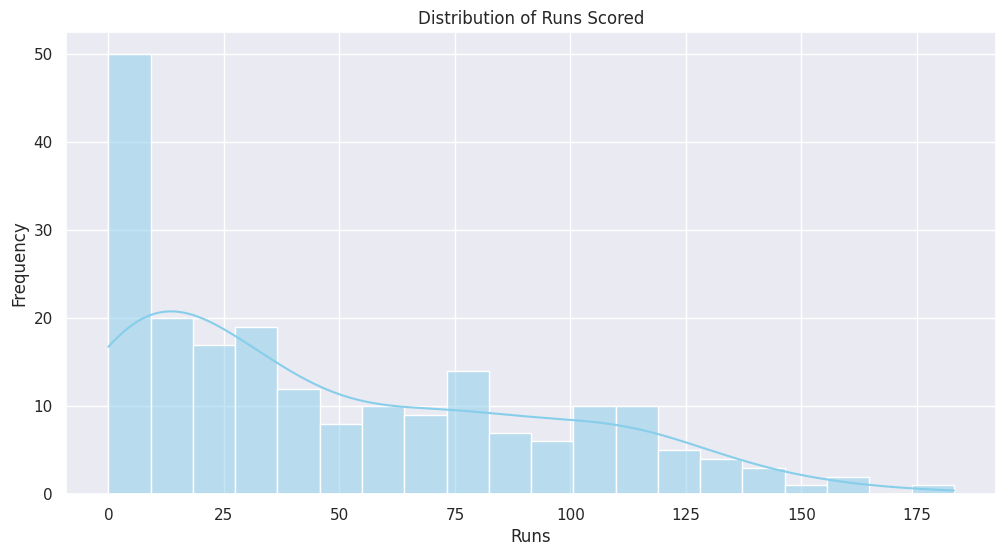

In [20]:
sns.histplot(df['RunsScored'], kde=True, color='skyblue', bins=20)
plt.title("Distribution of Runs Scored")
plt.xlabel("Runs")
plt.ylabel("Frequency")
plt.show()

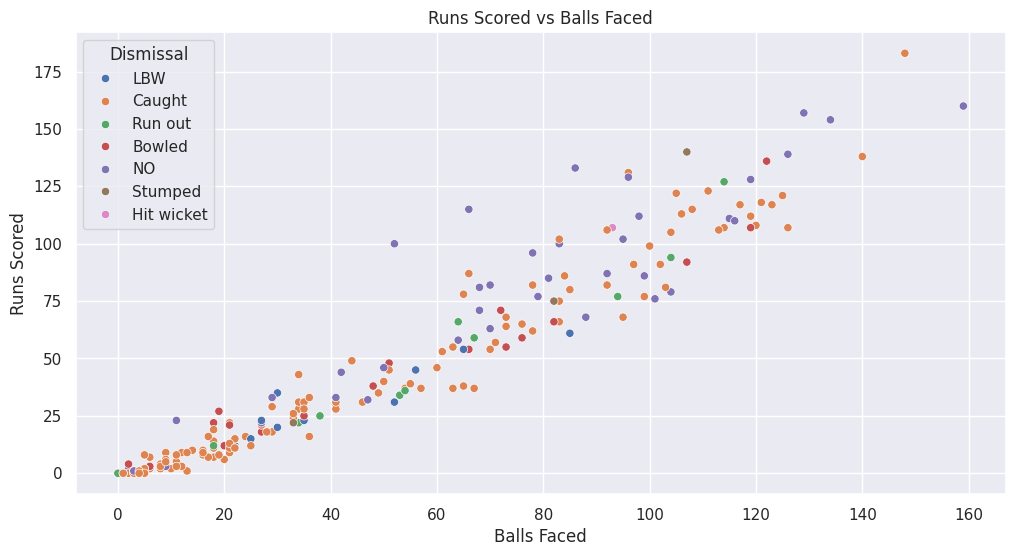

In [21]:
sns.scatterplot(data=df, x='BallsFaced', y='RunsScored', hue='Dismissal')
plt.title("Runs Scored vs Balls Faced")
plt.xlabel("Balls Faced")
plt.ylabel("Runs Scored")
plt.show()

<ipython-input-22-97ba039b2854>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Dismissal', order=df['Dismissal'].value_counts().index, palette='Set2')


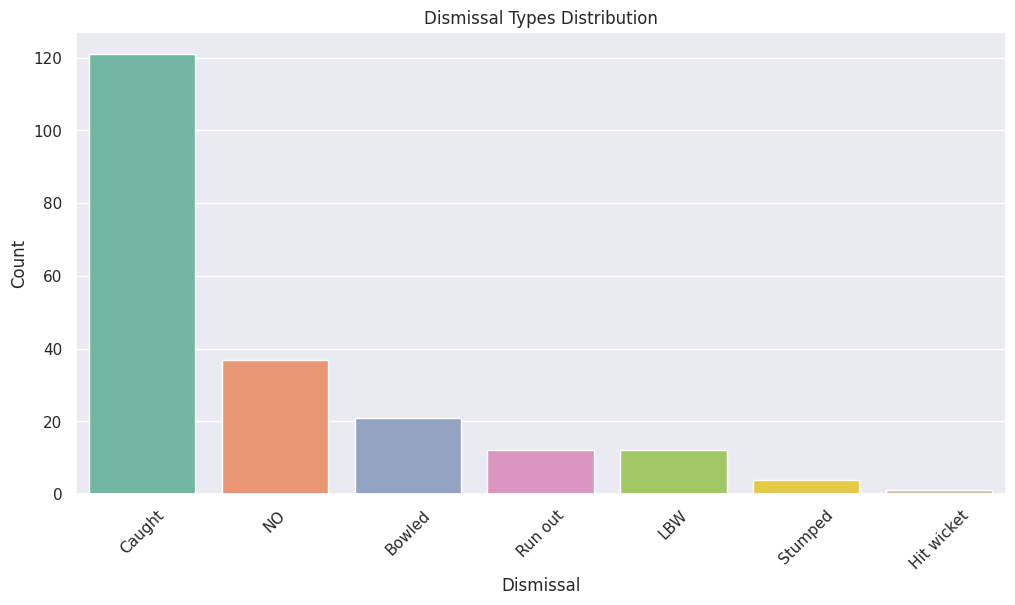

In [22]:
sns.countplot(data=df, x='Dismissal', order=df['Dismissal'].value_counts().index, palette='Set2')
plt.title("Dismissal Types Distribution")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

<ipython-input-23-df5600da16bf>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='BattingPosition', y='RunsScored', palette='coolwarm')


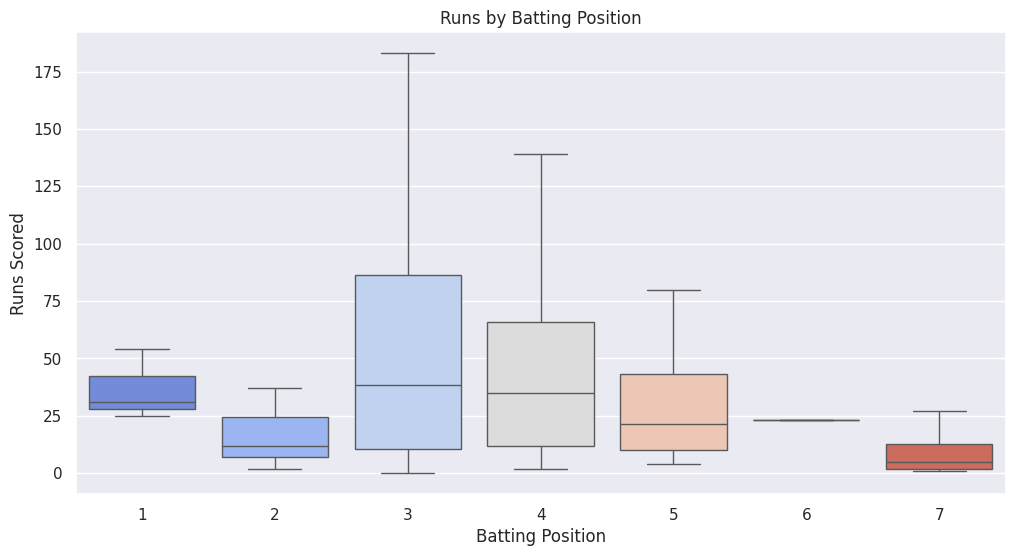

In [23]:
sns.boxplot(data=df, x='BattingPosition', y='RunsScored', palette='coolwarm')
plt.title("Runs by Batting Position")
plt.xlabel("Batting Position")
plt.ylabel("Runs Scored")
plt.show()

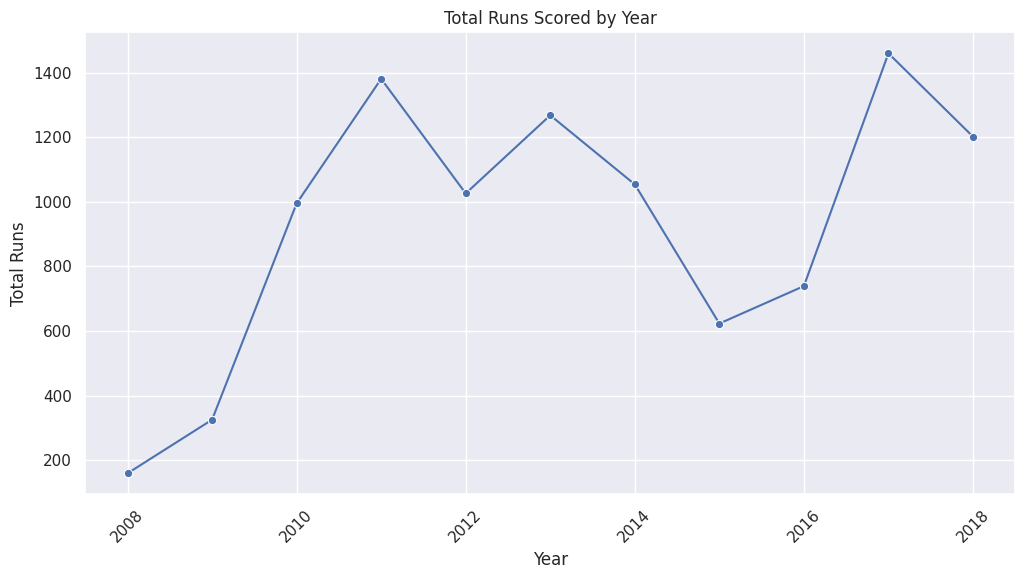

In [24]:
yearly = df.groupby('Year')['RunsScored'].sum().reset_index()

sns.lineplot(data=yearly, x='Year', y='RunsScored', marker='o')
plt.title("Total Runs Scored by Year")
plt.xlabel("Year")
plt.ylabel("Total Runs")
plt.xticks(rotation=45)
plt.show()

<ipython-input-25-33592bce8888>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=oppo, x='RunsScored', y='Opposition', palette='mako')


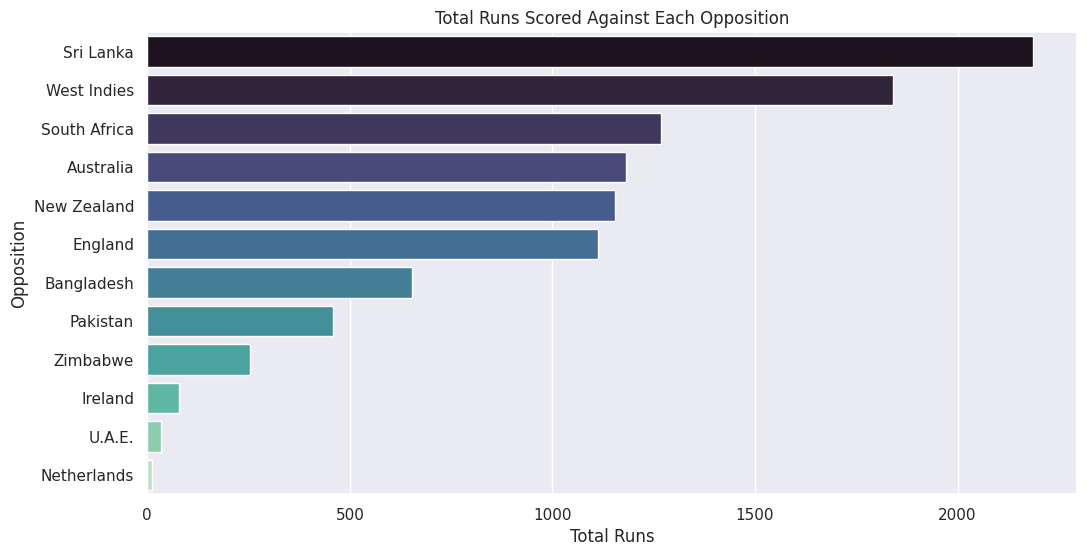

In [25]:
oppo = df.groupby('Opposition')['RunsScored'].sum().sort_values(ascending=False).reset_index()

sns.barplot(data=oppo, x='RunsScored', y='Opposition', palette='mako')
plt.title("Total Runs Scored Against Each Opposition")
plt.xlabel("Total Runs")
plt.ylabel("Opposition")
plt.show()

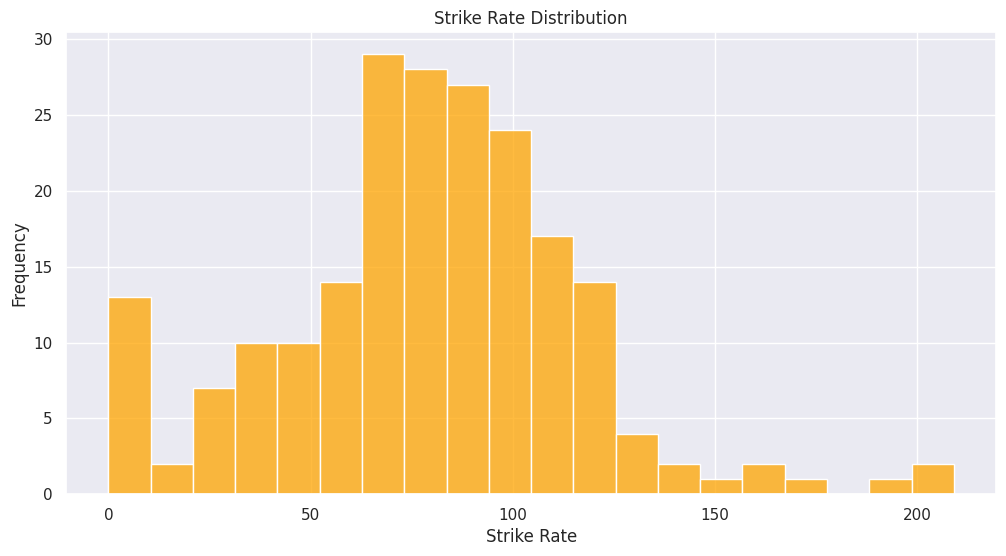

In [26]:
df['StrikeRate'] = (df['RunsScored'] / df['BallsFaced']) * 100
df['StrikeRate'] = df['StrikeRate'].fillna(0)

sns.histplot(df['StrikeRate'], bins=20, color='orange')
plt.title("Strike Rate Distribution")
plt.xlabel("Strike Rate")
plt.ylabel("Frequency")
plt.show()